# USED AUDI CARS PRICE PREDICTION

In [1]:
import pandas as pd
import os

In [2]:
DATA_PATH = os.path.join("datasets","audi")

In [3]:
def load_data(filename, data_path=DATA_PATH):
    csv_path = os.path.join(data_path, filename)
    return pd.read_csv(csv_path)

In [4]:
car = load_data("audi.csv")
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


Price is in pounds.\
Engine size in in Litres.

In [5]:
car.shape

(10668, 9)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


This is a fairly clean dataset with no null values.

In [7]:
car["model"].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

In [8]:
car.transmission.value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [9]:
car.fuelType.value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

In [10]:
car.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


### Visualizing the distribution of the data of the attributes.

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

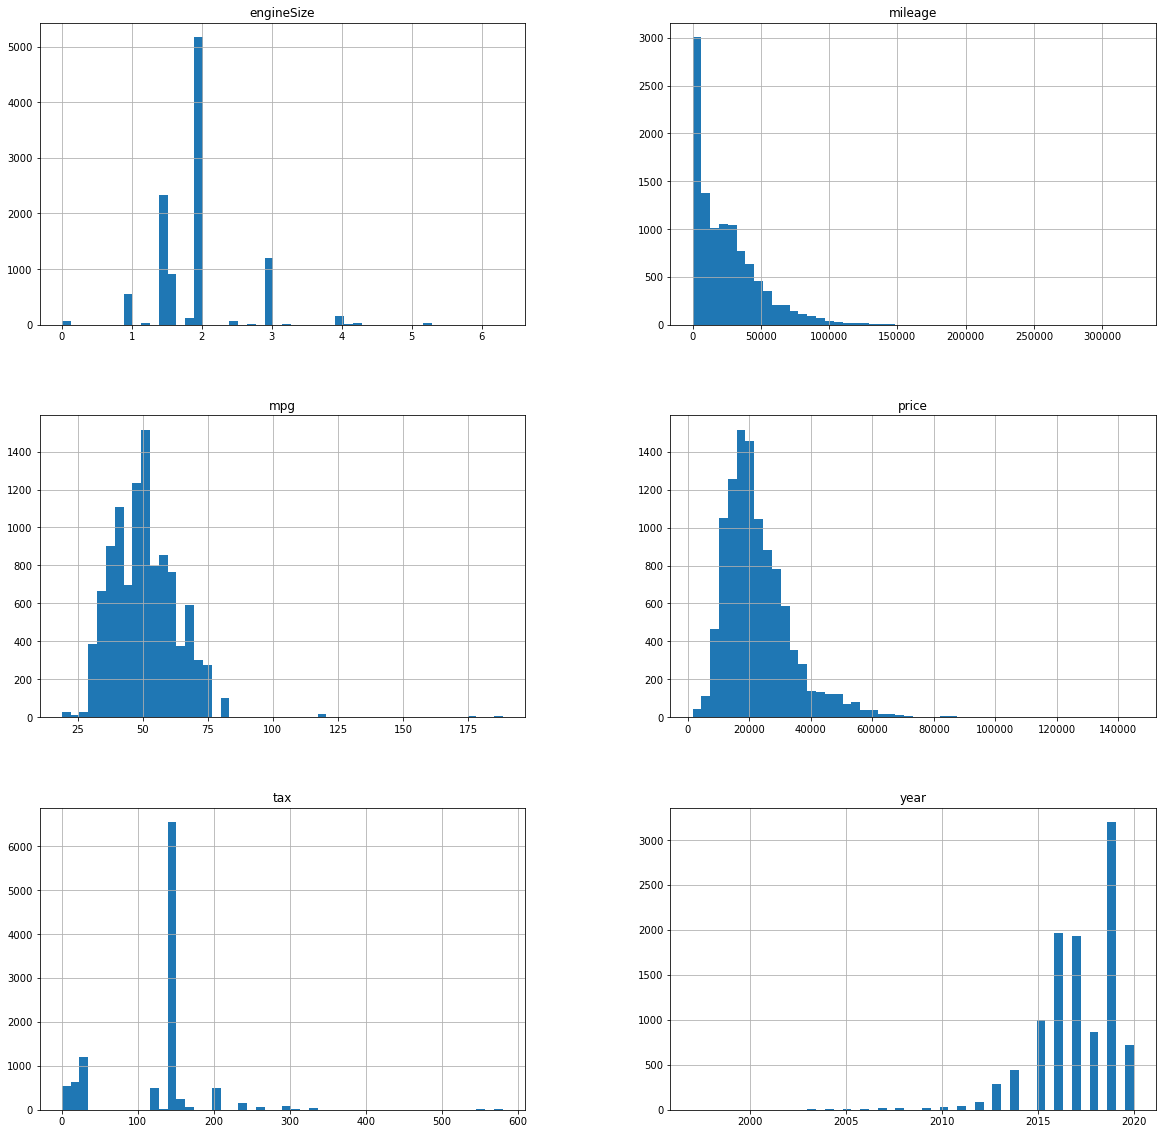

In [12]:
car.hist(bins=50, figsize=(20,20))
plt.show()

In [13]:
corr_matrix = car.corr()

In [14]:
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
year          0.592581
engineSize    0.591262
tax           0.356157
mileage      -0.535357
mpg          -0.600334
Name: price, dtype: float64

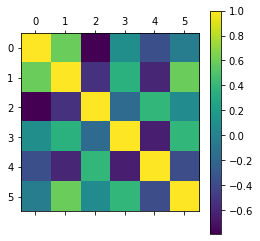

In [15]:
plt.matshow(corr_matrix)
plt.colorbar()
plt.show()

## Splitting the dataset

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_set, test_set = train_test_split(car, test_size=0.2, random_state=42)

In [18]:
car = train_set.copy()

In [19]:
car.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5398,A3,2019,20630,Manual,5922,Diesel,145,51.4,1.6
5860,Q3,2013,13495,Semi-Auto,48250,Diesel,205,47.9,2.0
906,RS3,2016,29888,Semi-Auto,29920,Petrol,300,34.9,2.5
8065,A6,2013,11299,Automatic,87567,Diesel,145,56.5,2.0
6520,Q2,2019,19946,Manual,100,Diesel,145,49.6,1.6


In [20]:
car.fuelType.value_counts()

Diesel    4477
Petrol    4033
Hybrid      24
Name: fuelType, dtype: int64

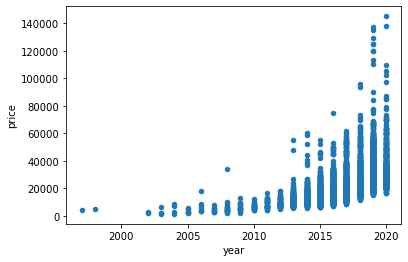

In [21]:
car.plot(kind="scatter", x="year", y="price")

In [22]:
from pandas.plotting import scatter_matrix

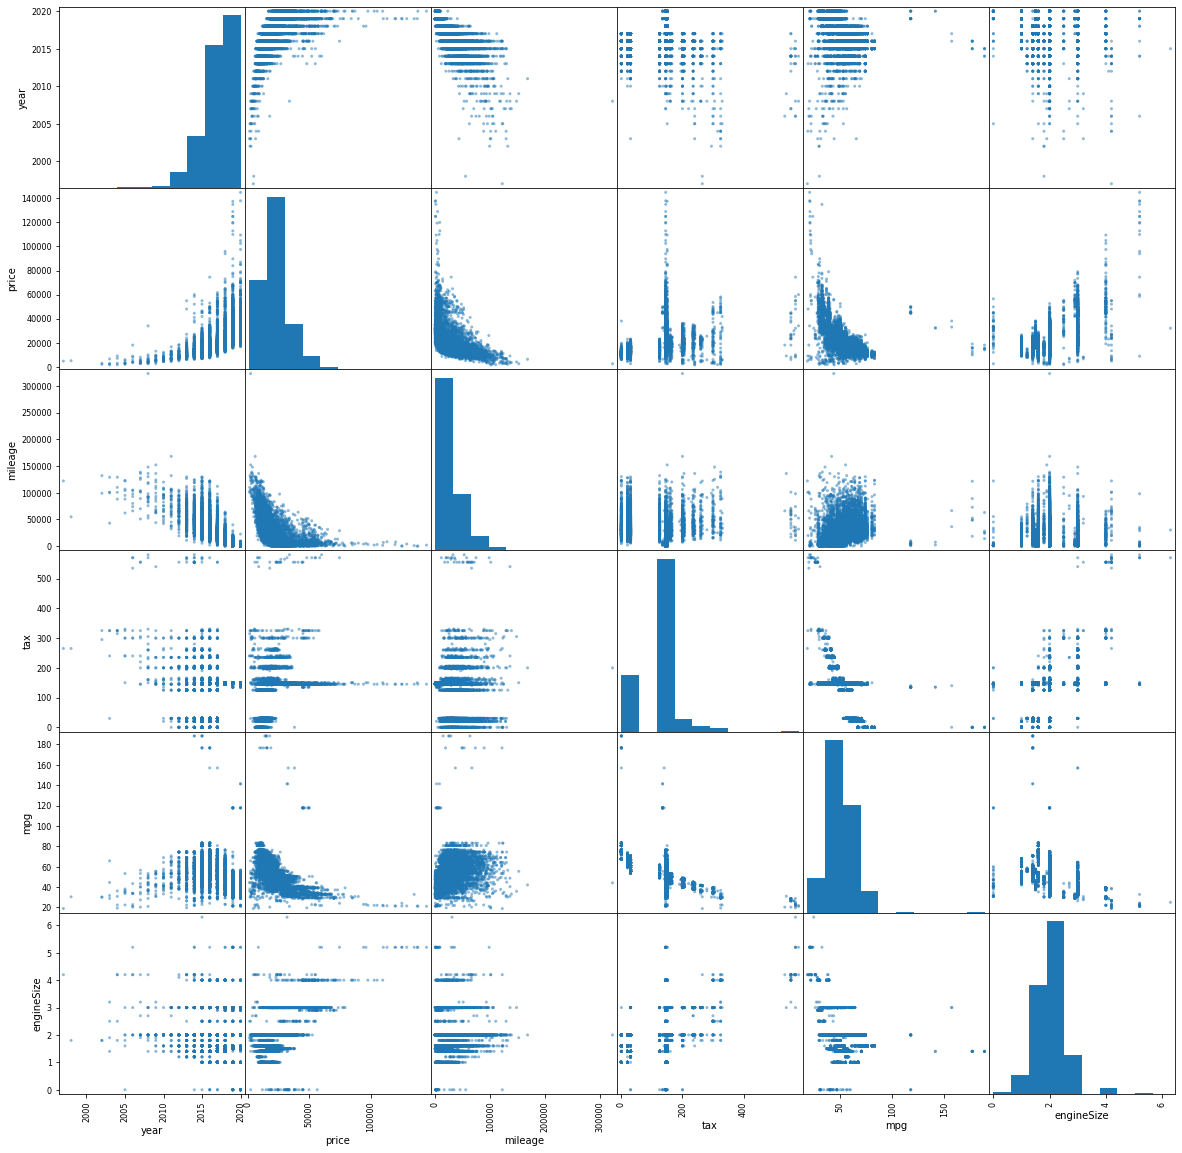

In [23]:
scatter_matrix(car, figsize=(20,20))
plt.show()

In [24]:
car = train_set.drop("price",axis=1)
car_labels = train_set["price"].copy()

In [25]:
car.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
5398,A3,2019,Manual,5922,Diesel,145,51.4,1.6
5860,Q3,2013,Semi-Auto,48250,Diesel,205,47.9,2.0
906,RS3,2016,Semi-Auto,29920,Petrol,300,34.9,2.5
8065,A6,2013,Automatic,87567,Diesel,145,56.5,2.0
6520,Q2,2019,Manual,100,Diesel,145,49.6,1.6


In [26]:
car_labels.head()

5398    20630
5860    13495
906     29888
8065    11299
6520    19946
Name: price, dtype: int64

## Feature Engineering

It is already a clean dataset hence no cleaning is required.

In [27]:
car_num = car.drop(["model","transmission","fuelType"],axis=1)

In [28]:
car_num.head()

,year,mileage,tax,mpg,engineSize
5398,2019,5922,145,51.4,1.6
5860,2013,48250,205,47.9,2.0
906,2016,29920,300,34.9,2.5
8065,2013,87567,145,56.5,2.0
6520,2019,100,145,49.6,1.6


In [29]:
car_cat = car[["model","transmission","fuelType"]]

In [30]:
car_cat.head()

,model,transmission,fuelType
5398,A3,Manual,Diesel
5860,Q3,Semi-Auto,Diesel
906,RS3,Semi-Auto,Petrol
8065,A6,Automatic,Diesel
6520,Q2,Manual,Diesel


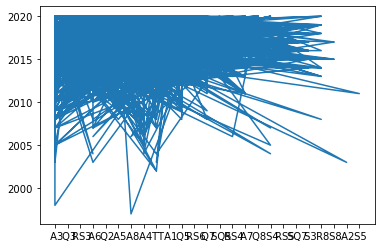

In [31]:
plt.plot(car["model"],car["year"])

### Encoding the categorical attributes 

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
cat_encoder = OneHotEncoder()

In [34]:
car_cat_1hot = cat_encoder.fit_transform(car_cat[["transmission","fuelType"]])

In [35]:
car_cat_1hot

<8534x6 sparse matrix of type '<class 'numpy.float64'>'
	with 17068 stored elements in Compressed Sparse Row format>

In [36]:
car.model.unique().shape

(25,)

In [37]:
!pip install category_encoders

In [38]:
import category_encoders as ce

In [39]:
bi_encoder = ce.BinaryEncoder(cols="model")
model_cat_encoded = bi_encoder.fit_transform(car_cat["model"])

In [40]:
model_cat_encoded

,model_0,model_1,model_2,model_3,model_4,model_5
5398,0,0,0,0,0,1
5860,0,0,0,0,1,0
906,0,0,0,0,1,1
8065,0,0,0,1,0,0
6520,0,0,0,1,0,1
...,...,...,...,...,...,...
5734,0,0,1,1,0,1
5191,0,0,1,0,0,0
5390,0,0,1,0,0,0
860,0,0,1,0,1,0


In [41]:
cat_encoder.categories_

[array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object),
 array(['Diesel', 'Hybrid', 'Petrol'], dtype=object)]

## Creating Pipeline

In [42]:
from sklearn.compose import ColumnTransformer

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
num_attribs = list(car_num)
num_attribs

['year', 'mileage', 'tax', 'mpg', 'engineSize']

In [45]:
cat_attribs_1hot = ["transmission","fuelType"]
cat_attribs_binary = ["model"]

In [46]:
car.columns

Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [47]:
full_pipeline = ColumnTransformer([
    ("std_scaler", StandardScaler(), num_attribs),
    ("cat_binary", ce.BinaryEncoder(), cat_attribs_binary),
    ("cat_1hot", OneHotEncoder(), cat_attribs_1hot)
])

In [48]:
car_prepared = full_pipeline.fit_transform(car)

In [49]:
car_prepared

array([[ 0.88068249, -0.80512407,  0.27943889, ...,  1.        ,
         0.        ,  0.        ],
       [-1.89367866,  0.98739679,  1.16565416, ...,  1.        ,
         0.        ,  0.        ],
       [-0.50649809,  0.21115158,  2.56882835, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.88068249, -0.63695878,  0.27943889, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.34307602, -1.03236531,  0.27943889, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.88068249, -0.9799804 ,  0.27943889, ...,  0.        ,
         0.        ,  1.        ]])

Our dataset is prepared to be feeded to our Machine Learning Model.

## Training Model

### Using Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lin_reg = LinearRegression()

In [52]:
lin_reg.fit(car_prepared, car_labels)

LinearRegression()

In [53]:
car_predictions = lin_reg.predict(car_prepared)

In [54]:
print("Predictions: ", car_predictions[:5])
print("Labels: ", list(car_labels)[:5])

Predictions:  [22826.875 11508.875 26131.75   7913.25  26123.375]
Labels:  [20630, 13495, 29888, 11299, 19946]


##### Measuring Root Mean Square Error

In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [56]:
lin_mse = mean_squared_error(car_labels,car_predictions)
lin_rmse = np.sqrt(lin_mse)

In [57]:
lin_rmse

4898.027652696221

### Using Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(car_prepared, car_labels)

DecisionTreeRegressor()

In [62]:
car_predictions = tree_reg.predict(car_prepared)

In [63]:
tree_mse = mean_squared_error(car_labels, car_predictions)
tree_rmse = np.sqrt(tree_mse)

In [64]:
tree_rmse

319.57328838390737

The error for decision tree regressor is quite low. But this may be due to over fitting.

### Using Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
forest_reg = RandomForestRegressor()
forest_reg.fit(car_prepared,car_labels)

RandomForestRegressor()

In [76]:
car_predictions = forest_reg.predict(car_prepared)

In [77]:
forest_mse = mean_squared_error(car_labels, car_predictions)
forest_rmse = np.sqrt(forest_mse)

In [78]:
forest_rmse

953.6459539081405

## Cross Validation

In [65]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [66]:
from sklearn.model_selection import cross_val_score

#### Linear Regression

In [67]:
lin_scores = cross_val_score(
    lin_reg, 
    car_prepared, 
    car_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

In [68]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [70]:
display_scores(lin_rmse_scores)

Scores:  [4446.68574398 4275.08258901 5402.43770853 5373.84963864 5733.02932699
 4689.31274439 4337.56595246 5161.59896481 4577.02779987 5073.03413516]
Mean:  4906.962460383341
Standard Deviation:  482.6854946268675


#### Decision Tree Regressor

In [71]:
tree_scores = cross_val_score(
    tree_reg, 
    car_prepared, 
    car_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

In [72]:
tree_rmse_scores = np.sqrt(-tree_scores)

In [73]:
display_scores(tree_rmse_scores)

Scores:  [3653.85110001 3085.66104302 3250.11293031 4304.85090727 3608.60723097
 3075.60850633 2826.77096089 2977.72786127 2911.77552272 2822.59679843]
Mean:  3251.756286122447
Standard Deviation:  448.5664251446426


#### Random Forest Regressor

In [80]:
forest_scores = cross_val_score(
    forest_reg, 
    car_prepared, 
    car_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

In [81]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [82]:
display_scores(forest_rmse_scores)

Scores:  [2491.18591469 2320.28385192 2627.25227663 2919.70274321 2388.82855063
 2228.52041314 2316.62875209 2304.61376289 2265.43255112 2347.8975717 ]
Mean:  2421.034638801491
Standard Deviation:  199.59507110031123


## Fine Tuning Model

### Grid Search CV

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [85]:
forest_reg = RandomForestRegressor()

In [86]:
grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv = 5,
    scoring = "neg_mean_squared_error",
    return_train_score=True
)

In [87]:
grid_search.fit(car_prepared, car_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [88]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [89]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [90]:
cv_results = grid_search.cv_results_

In [92]:
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

3191.490591002255 {'max_features': 2, 'n_estimators': 3}
2698.3196711287014 {'max_features': 2, 'n_estimators': 10}
2535.9181362182803 {'max_features': 2, 'n_estimators': 30}
2881.4945784808824 {'max_features': 4, 'n_estimators': 3}
2647.3777991634765 {'max_features': 4, 'n_estimators': 10}
2428.6322949030473 {'max_features': 4, 'n_estimators': 30}
2904.6784685401353 {'max_features': 6, 'n_estimators': 3}
2547.1624895040586 {'max_features': 6, 'n_estimators': 10}
2361.866238667718 {'max_features': 6, 'n_estimators': 30}
2828.7044322460238 {'max_features': 8, 'n_estimators': 3}
2434.411150777003 {'max_features': 8, 'n_estimators': 10}
2381.638260517792 {'max_features': 8, 'n_estimators': 30}
2988.8593543890547 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2719.538312498604 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2953.9600572102477 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2594.6686843481843 {'bootstrap': False, 'max_features': 3, 'n_esti

## Feature Importance

In [93]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [94]:
attributes = num_attribs + cat_attribs_binary + cat_attribs_1hot

In [95]:
sorted(zip(feature_importance,attributes), reverse=True)

[(0.32348798769762876, 'mpg'),
 (0.21092813942557684, 'engineSize'),
 (0.1574715058803044, 'mileage'),
 (0.1548597433919727, 'year'),
 (0.04370274535829067, 'tax'),
 (0.00947854442722704, 'fuelType'),
 (0.00875544243382984, 'transmission'),
 (0.0, 'model')]

## Evaluating on Test Set

In [96]:
final_model = grid_search.best_estimator_

In [97]:
final_model

RandomForestRegressor(max_features=6, n_estimators=30)

In [101]:
X_test = test_set.drop("price",axis=1)
y_test = test_set["price"].copy()

In [102]:
X_test_prepared = full_pipeline.transform(X_test)

In [103]:
final_predictions = final_model.predict(X_test_prepared)

In [104]:
final_mse = mean_squared_error(y_test, final_predictions)

In [105]:
final_rmse = np.sqrt(final_mse)
final_rmse

2396.537306755102